## 1. Load Python modules and data 

In [1]:
import pandas as pd
from glob import glob
from redditetl import get_reddit, get_submissions_df, get_comments_df, get_users_df
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

# Jupyter notebook and pandas display settings
InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100

# Input parameters
subreddit = "SnapLenses"
submissions_csv = "./data/df_submissions.csv"
comments_csv = "./data/df_comments.csv"
users_csv = "./data/df_users.csv"

# Load Subreddit, Comments, Users DataFrames
dir_lst = glob("./data/*")
print(dir_lst)
if ((submissions_csv in dir_lst) and 
    (comments_csv in dir_lst) and 
    (users_csv in dir_lst)):
    print("Load DataFrames from CSV")
    df_submissions = pd.read_csv(submissions_csv, index_col=0)
    df_comments = pd.read_csv(comments_csv, index_col=0)
    df_users = pd.read_csv(users_csv, index_col=0)
else:
    print("Download Reddit Sumbissions to " + subreddit)
    reddit = get_reddit(reddit_id='O5uq6JgA64Xt-g',
                        reddit_secret='G1Yr0bv0qg7FYRpCP8K1sj5Kxjs',
                        user_agent='Python:redditetl:v0.1 (by /u/alex4fire)')
    sr = reddit.subreddit('SnapLenses')
    print( sr.display_name, sr.id, sr.name)
    df_submissions = get_submissions_df(sr, submissions_limit=100000)
    df_submissions.to_csv(submissions_csv)
    
    df_comments = get_comments_df(reddit, df_submissions['id'].values)
    df_comments.to_csv(comments_csv)
    
    df_users = get_users_df(df_submissions, df_comments)
    df_users.to_csv(users_csv)
    
print("Submissions: " + str(df_submissions.shape[0]))
print("Comments: " + str(df_comments.shape[0]))
print("Users: " + str(df_users.shape[0]))

flairs = [x for x in df_users.columns if 'f_' in x]
[x.strip('f_') for x in flairs]

['./data/df_comments.csv', './data/df_users.csv', './data/df_submissions.csv']
Load DataFrames from CSV
Submissions: 995
Comments: 3079
Users: 2066


['ADVERTISEMENT',
 'DISCUSSION',
 "Definitely not removed because the mod definitely isn't dum dum",
 'MEME',
 'NEW FACE LENS',
 'NEW LENS 2D',
 'NEW LENS 3D',
 'Official Lens Studio Team',
 'PROGRESS UPDATE',
 'REQUEST',
 'REQUEST | Possible Spoiler',
 'REQUEST | Potential Spoiler',
 'no_flair']

In [2]:
df_submissions.head()

author   author_id   created_utc  downs  edited        flair  \
0  VicRattlehead    t2_6k9g9  1.531656e+09      0     0.0     no_flair   
1      D3_Sithic  t2_rnkv8hc  1.531634e+09      0     0.0      REQUEST   
2   Frozen_Atlas    t2_iyxeu  1.531597e+09      0     0.0  NEW LENS 2D   
3   Frozen_Atlas    t2_iyxeu  1.531595e+09      0     0.0  NEW LENS 2D   
4     nthOctopus   t2_46m3qv  1.531588e+09      0     0.0  NEW LENS 2D   

   hidden      id  is_video  likes  media  num_comments  num_crossposts  \
0   False  8z193q      True    NaN      1             0               0   
1   False  8yzmoq     False    NaN      0             0               0   
2   False  8yvrxn     False    NaN      0             1               0   
3   False  8yvkh2     False    NaN      0             2               0   
4   False  8yusco      True    NaN      1             4               0   

   num_reports  over_18  pinned  score selftext  \
0          NaN    False   False      6      NaN   
1          NaN    False   False      2      NaN   
2          NaN    False   False      3      NaN   
3          NaN    False   False      5      NaN   
4          NaN    False   False     12      NaN   

                                                                                    title  \
0                                                  Clout goggles is my new favorite lense   
1  Can we please get a filter that has little Deku run on screen to save us as All Might?   
2                                                                    Oooooooooooooooooohh   
3                                                              Metal Gear Solid Game Over   
4                                                      [HD] Alien Dancing to Money Longer   

   ups                                  url  
0    6      https://v.redd.it/gj0iy3qkq3a11  
1    2  https://i.redd.it/tuuntw2zv1a11.jpg  
2    3  https://i.redd.it/e5yfo60gty911.png  
3    5  https://i.redd.it/vl6vvet8oy911.png  
4   12      https://v.redd.it/grqtr3sz4y911

In [3]:
df_comments.head()

author   author_id  \
0         Frozen_Atlas    t2_iyxeu   
1         Frozen_Atlas    t2_iyxeu   
2  imjustheretohangout  t2_i2a8ggz   
3            TheRoosel    t2_mswxt   
4           MRNONAMEHH    t2_znmvc   

                                                       body   created_utc  \
0                                         snapchat_com_link  1.531597e+09   
1                                         snapchat_com_link  1.531595e+09   
2                          Thank you daddy mgs is my life.   1.531609e+09   
3  Yuh itdonotmatuhturntodadidasparkitoussidashecallmedadda  1.531627e+09   
4                                    LOL I want this lense!  1.531589e+09   

   downs       id  sbm_id  score  ups  sentiment  subjectivity  
0      0  e2e28q2  8yvrxn      1    1        0.0           0.0  
1      0  e2e0lj5  8yvkh2      1    1        0.0           0.0  
2      0  e2edv8w  8yvkh2      1    1        0.0           0.0  
3      0  e2et8v0  8yusco      3    3        0.0           0.0  
4      0  e2dukl1  8yusco      2    2        1.0           0.7

In [4]:
df_users.head()

sbm_cnt  total_sbm_score  total_sbm_comments  \
0IAH                 1.0              2.0                 1.0   
32Beannachtai        1.0              4.0                 0.0   
3liuae               2.0              9.0                 8.0   
A_Spoiled_Milks      1.0              5.0                 1.0   
Aarons9090           1.0              1.0                 5.0   

                 f_ADVERTISEMENT  f_DISCUSSION  \
0IAH                         0.0           0.0   
32Beannachtai                0.0           0.0   
3liuae                       0.0           1.0   
A_Spoiled_Milks              0.0           0.0   
Aarons9090                   0.0           0.0   

                 f_Definitely not removed because the mod definitely isn't dum dum  \
0IAH                                                                           0.0   
32Beannachtai                                                                  0.0   
3liuae                                                                         0.0   
A_Spoiled_Milks                                                                0.0   
Aarons9090                                                                     0.0   

                 f_MEME  f_NEW FACE LENS  f_NEW LENS 2D  f_NEW LENS 3D  \
0IAH                0.0              0.0            0.0            0.0   
32Beannachtai       0.0              0.0            0.0            0.0   
3liuae              0.0              0.0            1.0            0.0   
A_Spoiled_Milks     0.0              0.0            0.0            0.0   
Aarons9090          0.0              0.0            0.0            0.0   

                 f_Official Lens Studio Team  f_PROGRESS UPDATE  f_REQUEST  \
0IAH                                     0.0                0.0        0.0   
32Beannachtai                            0.0                0.0        1.0   
3liuae                                   0.0                0.0        0.0   
A_Spoiled_Milks                          0.0                0.0        0.0   
Aarons9090                               0.0                0.0        1.0   

                 f_REQUEST | Possible Spoiler  f_REQUEST | Potential Spoiler  \
0IAH                                      0.0                            0.0   
32Beannachtai                             0.0                            0.0   
3liuae                                    0.0                            0.0   
A_Spoiled_Milks                           0.0                            0.0   
Aarons9090                                0.0                            0.0   

                 f_no_flair  comments_cnt  sentiment_avg  commented_sbms_cnt  \
0IAH                    1.0           NaN            NaN                 NaN   
32Beannachtai           0.0           NaN            NaN                 NaN   
3liuae                  0.0           3.0       0.666667                 3.0   
A_Spoiled_Milks         1.0           NaN            NaN                 NaN   
Aarons9090              0.0           1.0       0.325000                 1.0   

                 subjectivity_avg  comments_score_avg  
0IAH                          NaN                 NaN  
32Beannachtai                 NaN                 NaN  
3liuae                       0.35            1.333333  
A_Spoiled_Milks               NaN                 NaN  
Aarons9090                   0.26            3.000000


_____

## 2. Subreddit submissions count by day (segmented by reddit flair)

In [5]:
# Create pivot table with submissions in each Flair
df_sbm_flairs = df_submissions[['flair', 'created_utc']]
df_sbm_flairs['created_utc'] = pd.to_datetime(df_sbm_flairs['created_utc'],
                                              unit='s',
                                              utc=True).apply(lambda x: x.date())
df_sbm_flairs = df_sbm_flairs.groupby(['flair', 'created_utc'])['created_utc'].count()
df_sbm_flairs = df_sbm_flairs.unstack(level=0).fillna(0)
df_sbm_flairs['submissions_total'] = df_sbm_flairs.sum(axis=1)
df_sbm_flairs

/home/asvic/code/aognenskiy-snaplenses/snap/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


flair        ADVERTISEMENT  DISCUSSION  \
created_utc                              
2018-04-06             0.0         0.0   
2018-04-07             0.0         0.0   
2018-04-08             0.0         1.0   
2018-04-09             1.0         0.0   
2018-04-10             0.0         3.0   
2018-04-11             0.0         1.0   
2018-04-12             0.0         1.0   
2018-04-13             0.0         0.0   
2018-04-14             1.0         0.0   
2018-04-15             0.0         0.0   
2018-04-16             0.0         0.0   
2018-04-17             0.0         1.0   
2018-04-18             0.0         0.0   
2018-04-19             0.0         0.0   
2018-04-20             1.0         0.0   
2018-04-21             0.0         0.0   
2018-04-22             0.0         0.0   
2018-04-23             0.0         0.0   
2018-04-24             0.0         0.0   
2018-04-25             0.0         0.0   
2018-04-26             0.0         1.0   
2018-04-27             0.0         0.0   
2018-04-28             0.0         0.0   
2018-04-29             0.0         0.0   
2018-04-30             0.0         1.0   
2018-05-01             0.0         0.0   
2018-05-02             1.0         0.0   
2018-05-03             0.0         1.0   
2018-05-04             0.0         0.0   
2018-05-05             0.0         0.0   
...                    ...         ...   
2018-06-16             0.0         0.0   
2018-06-17             0.0         0.0   
2018-06-18             0.0         0.0   
2018-06-19             0.0         2.0   
2018-06-20             0.0         0.0   
2018-06-21             0.0         0.0   
2018-06-22             0.0         0.0   
2018-06-23             0.0         0.0   
2018-06-24             0.0         1.0   
2018-06-25             0.0         0.0   
2018-06-26             0.0         0.0   
2018-06-27             0.0         0.0   
2018-06-28             0.0         1.0   
2018-06-29             0.0         0.0   
2018-06-30             0.0         0.0   
2018-07-01             0.0         0.0   
2018-07-02             0.0         0.0   
2018-07-03             0.0         0.0   
2018-07-04             0.0         1.0   
2018-07-05             0.0         0.0   
2018-07-06             0.0         0.0   
2018-07-07             0.0         0.0   
2018-07-08             0.0         0.0   
2018-07-09             0.0         0.0   
2018-07-10             0.0         1.0   
2018-07-11             0.0         0.0   
2018-07-12             0.0         0.0   
2018-07-13             0.0         0.0   
2018-07-14             0.0         0.0   
2018-07-15             0.0         0.0   

flair        Definitely not removed because the mod definitely isn't dum dum  \
created_utc                                                                    
2018-04-06                                                               0.0   
2018-04-07                                                               0.0   
2018-04-08                                                               0.0   
2018-04-09                                                               0.0   
2018-04-10                                                               0.0   
2018-04-11                                                               0.0   
2018-04-12                                                               0.0   
2018-04-13                                                               0.0   
2018-04-14                                                               0.0   
2018-04-15                                                               0.0   
2018-04-16                                                               0.0   
2018-04-17                                                               0.0   
2018-04-18                                                               0.0   
2018-04-19                                                               0.0   
2018-04-20                                                               

In [6]:
# Plot submissions by day in each Flair
from bokeh.palettes import Category20
from bokeh.models import Legend, DatetimeTickFormatter
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(plot_width=1600, plot_height=600, x_axis_type="datetime", toolbar_location="above")
p.title.text = 'Click on legend entries to hide the corresponding lines'
lst = []
for col_name, color in zip(list(df_sbm_flairs.columns), Category20[len(df_sbm_flairs.columns)]):
    r1 = p.line(df_sbm_flairs.index, df_sbm_flairs[col_name], line_width=2, color=color)
    lst.append((col_name, [r1]))

p.xaxis.formatter=DatetimeTickFormatter(
        hours=["%Y-%m-%d"],
        days=["%Y-%m-%d"],
        months=["%Y-%m-%d"],
        years=["%Y-%m-%d"],
    )
p.xaxis.major_label_orientation = 3.14 / 4

legend = Legend(items=lst, location=(10, 0), click_policy='hide')

p.add_layout(legend, 'right')
show(p)

Loading BokehJS ...

In [7]:
# Find current submissions trend
import statsmodels.api as sm
date_range = pd.date_range(start=min(df_sbm_flairs.index), end=max(df_sbm_flairs.index))
X = list(range(1, len(date_range)+1))
y = df_sbm_flairs["submissions_total"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      submissions_total   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     73.62
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           1.26e-13
Time:                        00:31:51   Log-Likelihood:                -359.23
No. Observations:                 101   AIC:                             720.5
Df Residuals:                     100   BIC:                             723.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1239      0.014      8.580      0.000       0.095       0.153
==============================================================================
Omnibus:                       33.531   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.727
Skew:                           1.319   Prob(JB):                     3.24e-15
Kurtosis:                       5.982   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/asvic/code/aognenskiy-snaplenses/snap/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


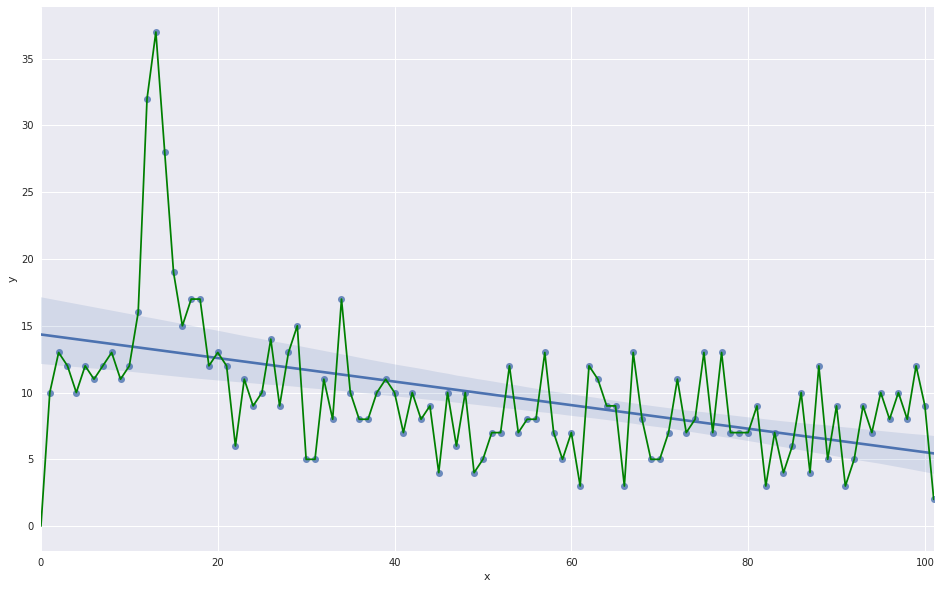

In [8]:
# Plot submissions trend
import seaborn as sns; sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(16,10)})
sns.regplot(x="x", y="y", 
            data=pd.DataFrame({'x':X, 'y':list(y.values)}),
            ci=95)
sns.tsplot(data=[0] + list(y.values), color='green')

### Summary:
Currently, the submissions count trend in SnapLenses subreddit is slightly negative. Possible causes that require additional research:
- mid-April anomaly 
- low activity due to Summer holidays season 
- changes in Flairs activity

____

## 3) Top subreddit users by submissions count

In [9]:
print("Top 10 Reddit users by Flair submissions")
for flair in ["sbm_cnt"] + flairs:
    print("\nReddit Flair: \"" + flair.strip("f_") + "\"\n")
    df_users[[flair]].sort_values(flair, ascending=False).head(10)

Top 10 Reddit users by Flair submissions

Reddit Flair: "sbm_cnt"



sbm_cnt
ZoarkFX            29.0
ApocTheLegend      27.0
iRashiD-AE         26.0
Frozen_Atlas       25.0
carlyc999          24.0
Numbaz501          22.0
Jinnie_the_Wew     20.0
mypinkyhurts       20.0
Bennyp3333         15.0
BoredHobbes        14.0


Reddit Flair: "ADVERTISEMENT"



f_ADVERTISEMENT
InformalTech                  6.0
0IAH                          0.0
hadleyeames                   0.0
governmentplate               0.0
gagenoblesisadip              0.0
fuhrer_snoke                  0.0
frodstuart                    0.0
frijoles07                    0.0
frankshi123                   0.0
flobi3                        0.0


Reddit Flair: "DISCUSSION"



f_DISCUSSION
Chris_HCE                  3.0
ayoung5555                 2.0
ApocTheLegend              2.0
BoredHobbes                2.0
JebCS                      1.0
Stormlight-Smash           1.0
SkittlezTheCool            1.0
BackpackNigga              1.0
SnapEric                   1.0
tomdrum6                   1.0


Reddit Flair: "Definitely not removed because the mod definitely isn't dum dum"



f_Definitely not removed because the mod definitely isn't dum dum
Bennyp3333                                                                      1.0
0IAH                                                                            0.0
hadleyeames                                                                     0.0
governmentplate                                                                 0.0
gagenoblesisadip                                                                0.0
fuhrer_snoke                                                                    0.0
frodstuart                                                                      0.0
frijoles07                                                                      0.0
frankshi123                                                                     0.0
flobi3                                                                          0.0


Reddit Flair: "MEME"



f_MEME
Jinnie_the_Wew      4.0
JeffResc            3.0
ZoarkFX             3.0
mypinkyhurts        3.0
carteroxicano       2.0
governmentplate     1.0
mimi_phd            1.0
morisfun            1.0
tacolamp            1.0
C227C227            1.0


Reddit Flair: "NEW FACE LENS"



f_NEW FACE LENS
ZoarkFX                     13.0
Numbaz501                   12.0
mypinkyhurts                11.0
ApocTheLegend                8.0
dombeef                      7.0
Shotgunner56                 7.0
Bennyp3333                   7.0
romanejaquez                 6.0
BoredHobbes                  4.0
paper_triangles              4.0


Reddit Flair: "NEW LENS 2D"



f_NEW LENS 2D
Frozen_Atlas             16.0
iRashiD-AE               12.0
carlyc999                10.0
ZoarkFX                   9.0
Numbaz501                 8.0
ApocTheLegend             8.0
Jinnie_the_Wew            6.0
nadoben                   4.0
mypinkyhurts              3.0
No_Constant               3.0


Reddit Flair: "NEW LENS 3D"



f_NEW LENS 3D
allthingsvr                9.0
mendeza503                 5.0
paper_triangles            5.0
Frozen_Atlas               5.0
Jinnie_the_Wew             4.0
BoredHobbes                3.0
fuhrer_snoke               3.0
cyreneq                    3.0
Shotgunner56               2.0
CrazyVito11                2.0


Reddit Flair: "Official Lens Studio Team"



f_Official Lens Studio Team
LSTravis                                  1.0
0IAH                                      0.0
elephant_catcher                          0.0
governmentplate                           0.0
gagenoblesisadip                          0.0
fuhrer_snoke                              0.0
frodstuart                                0.0
frijoles07                                0.0
frankshi123                               0.0
flobi3                                    0.0


Reddit Flair: "PROGRESS UPDATE"



f_PROGRESS UPDATE
ApocTheLegend                    4.0
mypinkyhurts                     3.0
Jinnie_the_Wew                   3.0
Numbaz501                        1.0
VirtualRealitySTL                1.0
Frozen_Atlas                     1.0
Matty_699                        1.0
Fuseman                          1.0
fuhrer_snoke                     1.0
swatchstudio                     1.0


Reddit Flair: "REQUEST"



f_REQUEST
D3_Sithic             3.0
jaxonnbassettt        3.0
Lolrly123             2.0
chandman2             2.0
XGonGiveIt2You        2.0
TrapTarzan            2.0
shawn0110             2.0
sugar_cookee          2.0
Virtual99             2.0
alexi31               2.0


Reddit Flair: "REQUEST | Possible Spoiler"



f_REQUEST | Possible Spoiler
radioactivecowz                           1.0
williamml715                              1.0
fabulaspotato                             0.0
emilsellstrom                             0.0
endslayer77                               0.0
epicninja5432                             0.0
etha0013                                  0.0
ezekiel1792                               0.0
0IAH                                      0.0
ecommerce_seo                             0.0


Reddit Flair: "REQUEST | Potential Spoiler"



f_REQUEST | Potential Spoiler
AngleDAB                                    1.0
hadleyeames                                 0.0
governmentplate                             0.0
gagenoblesisadip                            0.0
fuhrer_snoke                                0.0
frodstuart                                  0.0
frijoles07                                  0.0
frankshi123                                 0.0
flobi3                                      0.0
fabulaspotato                               0.0


Reddit Flair: "no_flair"



f_no_flair
AutoModerator        14.0
carlyc999            13.0
iRashiD-AE           10.0
Vodkool               6.0
Chris_HCE             5.0
arfected              4.0
mendeza503            4.0
ApocTheLegend         4.0
MorrisMoss            3.0
JeffResc              3.0

___

## 4) Top submissions by comments and score


In [10]:
for flair in [".*"] + [f.strip("f_") for f in flairs]:
    print("\n\nReddit Flair: \"" + flair + "\"\n")
    print("\n\nTop 10 Submissions by Comments")
    df_sbm_flair = df_submissions[df_submissions["flair"].str.contains(flair)]
    df_sbm_comments = df_sbm_flair.sort_values("num_comments", ascending=False).head(10)
    df_sbm_comments[["title", "num_comments", "score", "url"]]
    
    print("\nTop 10 Submissions by Score")
    df_sbm_score = df_sbm_flair.sort_values("score", ascending=False).head(10)
    df_sbm_score[["title", "num_comments", "score", "url"]]

    print("\n" * 3 + "_" * 100)



Reddit Flair: ".*"



Top 10 Submissions by Comments


title  \
452                                              The sacred lens is nearing completion   
690                                               друг Meme! - WITH SOUND AND OVERLAY!   
621                 Screaming kid [Gyro activated, smooth transition, animated, audio]   
266                                                                 AR Earthquake Lens   
162                                                  Can this filter be a possibility?   
134                                            These things from Detroit Become Human.   
29                                                    Pixelate your face or the world!   
756  Snap Lens Ninja: now with over 2,500 lenses and usernames! (reserve yours today!)   
242                                                          Russia World Cup Filters!   
43                                      [REQUEST] This goofy mf with the music pleas e   

     num_comments  score                                  url  
452           175   2776      https://v.redd.it/skl7zcnkiiy01  
690            90    475  https://i.redd.it/z9t21532pwt01.png  
621            85   1461      https://v.redd.it/s7xviyoqu7v01  
266            74   2857      https://v.redd.it/7br85ycz8d311  
162            62    761  https://i.redd.it/vvtdkmwzmq511.jpg  
134            54    517  https://i.redd.it/v7tp8i8qmm611.jpg  
29             51    470      https://v.redd.it/loiob3y6ai911  
756            51    530  https://i.redd.it/sn4hku3f63t01.png  
242            49    303      https://v.redd.it/penvooj7az311  
43             49   1028      https://v.redd.it/14zc39k286911


Top 10 Submissions by Score


title  \
266                                                        AR Earthquake Lens   
452                                     The sacred lens is nearing completion   
376  If a pretty girl can get hundreds of likes, how many can our troops get?   
518                                                        Glitch Effect Lens   
872                                            Not Hot Dog app Snapchat lens!   
621        Screaming kid [Gyro activated, smooth transition, animated, audio]   
597                                                      I’m loving this meme   
434                                                        Portal to the past   
5                                       Can anyone make a snaplens like this?   
648                            Stop Motion Lens v2 - Make your own animation!   

     num_comments  score                                  url  
266            74   2857      https://v.redd.it/7br85ycz8d311  
452           175   2776      https://v.redd.it/skl7zcnkiiy01  
376            47   1729      https://v.redd.it/an0p1pnytj011  
518            43   1589      https://v.redd.it/0vh78bx994x01  
872            37   1585      https://v.redd.it/1g0r2tphy9s01  
621            85   1461      https://v.redd.it/s7xviyoqu7v01  
597            13   1361      https://v.redd.it/f04i3snvrmv01  
434            26   1310      https://v.redd.it/zzp2f9q3r2z01  
5              40   1263  https://i.redd.it/q4rpd1gnsw911.jpg  
648            32   1181      https://v.redd.it/tcscigrlzou01




____________________________________________________________________________________________________


Reddit Flair: "ADVERTISEMENT"



Top 10 Submissions by Comments


title  \
756                    Snap Lens Ninja: now with over 2,500 lenses and usernames! (reserve yours today!)   
896                       Snap Lens Ninja: now with an even better UI and availability in all countries!   
606                                                Snap Lens Ninja: 3000 lenses, android beta, and more!   
954  Snap Lens Ninja: a new, better, & AD-Free method of sharing and discovering snap lenses! (Alread...   
522                                                         Snap Lens Ninja 2.0: now on Android and iOS!   
454                                                 Snap Lens Ninja: Over 4,000 lenses, Android and iOS!   

     num_comments  score  \
756            51    530   
896            30    406   
606            29    369   
954            11      0   
522             6     15   
454             2      2   

                                                                        url  
756                                     https://i.redd.it/sn4hku3f63t01.png  
896                                     https://i.redd.it/og0ydwvlbwr01.png  
606                                         https://v.redd.it/0051ywen8hv01  
954  https://itunes.apple.com/us/app/snap-lens-ninja/id1348455901?ls=1&mt=8  
522                                     https://i.redd.it/k6fih6ztc2x01.png  
454                                         https://v.redd.it/9ag8wki25gy01


Top 10 Submissions by Score


title  \
756                    Snap Lens Ninja: now with over 2,500 lenses and usernames! (reserve yours today!)   
896                       Snap Lens Ninja: now with an even better UI and availability in all countries!   
606                                                Snap Lens Ninja: 3000 lenses, android beta, and more!   
522                                                         Snap Lens Ninja 2.0: now on Android and iOS!   
454                                                 Snap Lens Ninja: Over 4,000 lenses, Android and iOS!   
954  Snap Lens Ninja: a new, better, & AD-Free method of sharing and discovering snap lenses! (Alread...   

     num_comments  score  \
756            51    530   
896            30    406   
606            29    369   
522             6     15   
454             2      2   
954            11      0   

                                                                        url  
756                                     https://i.redd.it/sn4hku3f63t01.png  
896                                     https://i.redd.it/og0ydwvlbwr01.png  
606                                         https://v.redd.it/0051ywen8hv01  
522                                     https://i.redd.it/k6fih6ztc2x01.png  
454                                         https://v.redd.it/9ag8wki25gy01  
954  https://itunes.apple.com/us/app/snap-lens-ninja/id1348455901?ls=1&mt=8




____________________________________________________________________________________________________


Reddit Flair: "DISCUSSION"



Top 10 Submissions by Comments


title  \
939                                                                  My SnapChat Goodie Box   
943                                                             Anyone else get this email?   
388                         [REQUEST] People should use the search before requesting a lens   
330                                                                       The good old days   
916                                                         My toilet lens was added today!   
547                                         How do I make music play when I tap the screen?   
560                                           What do you want tutorials on for Lens Studio   
561                                                            How do you guys save lenses?   
565  How is everyone making games, black & white filters, boomerangs and stop motion lenses   
661                                                                Join our Discord Server!   

     num_comments  score  \
939            32    504   
943            23     15   
388            11    192   
330            11      0   
916            10     11   
547             9      2   
560             8      4   
561             7      0   
565             6     10   
661             6      6   

                                                                                                     url  
939                                                                  https://i.redd.it/8u538iyyc5r01.png  
943                                                   https://gyazo.com/c9ad988af5542dc420f4f298334c489d  
388     https://www.reddit.com/r/SnapLenses/comments/8mjbgg/request_people_should_use_the_search_before/  
330                               https://www.reddit.com/r/SnapLenses/comments/8o0xcy/the_good_old_days/  
916                  https://www.reddit.com/r/SnapLenses/comments/8brns8/my_toilet_lens_was_added_today/  
547  https://www.reddit.com/r/SnapLenses/comments/8hx8ei/how_do_i_make_music_play_when_i_tap_the_screen/  
560   https://www.reddit.com/r/SnapLenses/comments/8hl66e/what_do_you_want_tutorials_on_for_lens_studio/  
561                     https://www.reddit.com/r/SnapLenses/comments/8hkpmw/how_do_you_guys_save_lenses/  
565  https://www.reddit.com/r/SnapLenses/comments/8hi9k7/how_is_everyone_making_games_black_white_fil...  
661                         https://www.reddit.com/r/SnapLenses/comments/8f75g0/join_our_discord_server/


Top 10 Submissions by Score


title  \
939                                                                               My SnapChat Goodie Box   
388                                      [REQUEST] People should use the search before requesting a lens   
442                                                            Bluetooth LED AR App controlled Ghostface   
854                                                 All the current Snapchat Templates we can work with!   
474                                                                     Infinity war and topical lenses.   
45                                    Snapchat is making it easier to find lenses created by other users   
549                                                    The lens approver people are getting on my nerves   
943                                                                          Anyone else get this email?   
960  Here's a tutorial on adding collision detection to your lenses! Made it from the Space Invaders ...   
403  Snap content creators! Love the quality of work here. How much do you charge for your snap filte...   

     num_comments  score  \
939            32    504   
388            11    192   
442             5     89   
854             2     40   
474             5     37   
45              0     24   
549             5     18   
943            23     15   
960             0     14   
403             5     13   

                                                                                                     url  
939                                                                  https://i.redd.it/8u538iyyc5r01.png  
388     https://www.reddit.com/r/SnapLenses/comments/8mjbgg/request_people_should_use_the_search_before/  
442                                                                      https://v.redd.it/3bvys4l1uqy01  
854                                                                  https://i.redd.it/bicw7jnazgs01.png  
474                 https://www.reddit.com/r/SnapLenses/comments/8jmuk3/infinity_war_and_topical_lenses/  
45                                               https://mashable.com/2018/07/10/snapchat-lens-explorer/  
549  https://www.reddit.com/r/SnapLenses/comments/8hw6zh/the_lens_approver_people_are_getting_on_my_n...  
943                                                   https://gyazo.com/c9ad988af5542dc420f4f298334c489d  
960  https://www.youtube.com/watch?v=viOmxZDan-Y&feature=youtu.be&list=PLihwab7Zw-Kx3WwFnH_5YjU0oz1JE...  
403                                                                      https://v.redd.it/191vq2aq3tz01




____________________________________________________________________________________________________


Reddit Flair: "Definitely not removed because the mod definitely isn't dum dum"



Top 10 Submissions by Comments


title  \
376  If a pretty girl can get hundreds of likes, how many can our troops get?   

     num_comments  score                              url  
376            47   1729  https://v.redd.it/an0p1pnytj011


Top 10 Submissions by Score


title  \
376  If a pretty girl can get hundreds of likes, how many can our troops get?   

     num_comments  score                              url  
376            47   1729  https://v.redd.it/an0p1pnytj011




____________________________________________________________________________________________________


Reddit Flair: "MEME"



Top 10 Submissions by Comments


title  num_comments  score  \
440  Saturdays are for the boys            20    495   
328                Rub my belly            17    832   
651      A Moody Moni appeared!            16    262   
274                        Ahhh            14    435   
252       That's right my dudes            14    980   
112  Man I get so bored at work            14   1139   
597        I’m loving this meme            13   1361   
247   This is an adequate lens.            13    457   
129             To be continued            13    415   
300           My favorite snack            12    575   

                                     url  
440      https://v.redd.it/gdozb6dwfty01  
328  https://i.redd.it/4tnjfcv8po111.jpg  
651      https://v.redd.it/xcw1wjlg0nu01  
274      https://v.redd.it/yqq4gs2qaz211  
252      https://v.redd.it/0k0bhz4oek311  
112      https://v.redd.it/8ltt5m4p98711  
597      https://v.redd.it/f04i3snvrmv01  
247      https://v.redd.it/l4k4ymuhwp311  
129      https://v.redd.it/fw0kf2i86t611  
300      https://v.redd.it/o6uovkpl2h211


Top 10 Submissions by Score


title  \
597                                                                                 I’m loving this meme   
112                                                                           Man I get so bored at work   
974                                                                                 I love this too much   
252                                                                                That's right my dudes   
508                                                                                  Blue line my dudes.   
328                                                                                         Rub my belly   
300                                                                                    My favorite snack   
440                                                                           Saturdays are for the boys   
247                                                                            This is an adequate lens.   
609  What they don’t tell you about getting a dog. Credit to u/Jinnie_the_wew for creating a truly un...   

     num_comments  score                                  url  
597            13   1361      https://v.redd.it/f04i3snvrmv01  
112            14   1139      https://v.redd.it/8ltt5m4p98711  
974            11    988      https://v.redd.it/zdy9fb992kq01  
252            14    980      https://v.redd.it/0k0bhz4oek311  
508            11    854      https://v.redd.it/6qlt0hmenbx01  
328            17    832  https://i.redd.it/4tnjfcv8po111.jpg  
300            12    575      https://v.redd.it/o6uovkpl2h211  
440            20    495      https://v.redd.it/gdozb6dwfty01  
247            13    457      https://v.redd.it/l4k4ymuhwp311  
609             4    453      https://v.redd.it/rtm8j40hrcv01




____________________________________________________________________________________________________


Reddit Flair: "NEW FACE LENS"



Top 10 Submissions by Comments


title  \
29                                                                      Pixelate your face or the world!   
242                                                                            Russia World Cup Filters!   
447                                                                 The Infinity War Disintegration Lens   
709                                                                                AR Tentacle Eyes Lens   
635                                                                       Hate the player not the game 💪   
843                                                                                   Mouth in Eyes Lens   
234  We packed a TON of content into the ultimate St. Louis-themed Lens: 5 face effects, a portal wit...   
346                                                             #BURNBLUE! Dallas is on FIRE this week!!   
141                           Bloxx is now live. A Snapchat lens that reacts to your facial expressions!   
675                                                                            Glowing Eyes Face Filter!   

     num_comments  score                                  url  
29             51    470      https://v.redd.it/loiob3y6ai911  
242            49    303      https://v.redd.it/penvooj7az311  
447            37    884         https://streamable.com/fobow  
709            35    951      https://v.redd.it/ehn5talw6nt01  
635            33   1032      https://v.redd.it/8cgb31ijiwu01  
843            32    947      https://v.redd.it/euearz82qhs01  
234            29    466      https://v.redd.it/xpmtzpqo77411  
346            25    202      https://v.redd.it/rjn9jforva111  
141            22    620  https://i.redd.it/tunrphl7td611.png  
675            21    465  https://i.redd.it/59wyz6b415u01.png


Top 10 Submissions by Score


title  \
635                                              Hate the player not the game 💪   
709                                                       AR Tentacle Eyes Lens   
843                                                          Mouth in Eyes Lens   
447                                        The Infinity War Disintegration Lens   
795                                             These displays were at Best Buy   
141  Bloxx is now live. A Snapchat lens that reacts to your facial expressions!   
436                                                             Iron Man lens!!   
813                                                           PUBG Lvl.3 Helmet   
463                                   Iron Man Mask That Opens With Jarvis HUD!   
29                                             Pixelate your face or the world!   

     num_comments  score                                  url  
635            33   1032      https://v.redd.it/8cgb31ijiwu01  
709            35    951      https://v.redd.it/ehn5talw6nt01  
843            32    947      https://v.redd.it/euearz82qhs01  
447            37    884         https://streamable.com/fobow  
795            17    625  https://i.redd.it/j1ihgvs78rs01.jpg  
141            22    620  https://i.redd.it/tunrphl7td611.png  
436            10    573      https://v.redd.it/8odi7dzncxy01  
813            21    564  https://i.redd.it/5p61v99n1os01.jpg  
463            17    516         https://streamable.com/yqggv  
29             51    470      https://v.redd.it/loiob3y6ai911




____________________________________________________________________________________________________


Reddit Flair: "NEW LENS 2D"



Top 10 Submissions by Comments


title  \
690                                друг Meme! - WITH SOUND AND OVERLAY!   
621  Screaming kid [Gyro activated, smooth transition, animated, audio]   
518                                                  Glitch Effect Lens   
576      Stop Motion Lens - v2.5 with onion skinning and playback speed   
872                                      Not Hot Dog app Snapchat lens!   
648                      Stop Motion Lens v2 - Make your own animation!   
994                                      Walmart Yodeling Kid EDM Remix   
569                                                 Boomerang Snap Lens   
149                                                              Sketch   
556                    Tron Filter, inspired by the Sketch Outline lens   

     num_comments  score                                  url  
690            90    475  https://i.redd.it/z9t21532pwt01.png  
621            85   1461      https://v.redd.it/s7xviyoqu7v01  
518            43   1589      https://v.redd.it/0vh78bx994x01  
576            39    541      https://v.redd.it/019o7da8hwv01  
872            37   1585      https://v.redd.it/1g0r2tphy9s01  
648            32   1181      https://v.redd.it/tcscigrlzou01  
994            25    749      https://v.redd.it/4vnwsqcpiaq01  
569            25    824      https://v.redd.it/gpv8zlcxi4w01  
149            24    503      https://v.redd.it/2bbtyjtph5611  
556            22    725      https://v.redd.it/vkw7r660wfw01


Top 10 Submissions by Score


title  \
518                                                                      Glitch Effect Lens   
872                                                          Not Hot Dog app Snapchat lens!   
621                      Screaming kid [Gyro activated, smooth transition, animated, audio]   
648                                          Stop Motion Lens v2 - Make your own animation!   
62                        Cherry Blossom - Turn green into red for an instant japanese look   
587                                                                     Sketch Outline Lens   
569                                                                     Boomerang Snap Lens   
488  iDubbbz green screen clips, 3 clips to choose from (Swipe left to switch, Tap to play)   
994                                                          Walmart Yodeling Kid EDM Remix   
556                                        Tron Filter, inspired by the Sketch Outline lens   

     num_comments  score                                  url  
518            43   1589      https://v.redd.it/0vh78bx994x01  
872            37   1585      https://v.redd.it/1g0r2tphy9s01  
621            85   1461      https://v.redd.it/s7xviyoqu7v01  
648            32   1181      https://v.redd.it/tcscigrlzou01  
62             20    939  https://i.redd.it/r5o8k5bbeq811.png  
587            19    900      https://v.redd.it/riphwmfhkqv01  
569            25    824      https://v.redd.it/gpv8zlcxi4w01  
488            11    799      https://v.redd.it/cw87y89o6tx01  
994            25    749      https://v.redd.it/4vnwsqcpiaq01  
556            22    725      https://v.redd.it/vkw7r660wfw01




____________________________________________________________________________________________________


Reddit Flair: "NEW LENS 3D"



Top 10 Submissions by Comments


title  \
266                                                     AR Earthquake Lens   
19                                                              AR Message   
196            [WIP] Playable Piano... Beta Version now available for use!   
434                                                     Portal to the past   
80                                              Bring life to your objects   
580                                  Spaceplanar: Doodle your own wedding!   
527                                                       New pet who dis.   
458  Portal Lens! Put yourself inside a portal [Animated, 3D, Interactive]   
385                                        Waiting for a frozen banana....   
945                                                           Beach Doodle   

     num_comments  score                              url  
266            74   2857  https://v.redd.it/7br85ycz8d311  
19             44    927  https://v.redd.it/rgvnt7r5zp911  
196            37    420  https://v.redd.it/0odv541pkz411  
434            26   1310  https://v.redd.it/zzp2f9q3r2z01  
80             24    728  https://v.redd.it/uaf2v8n4f6811  
580            19    489  https://v.redd.it/ur9dpjg87vv01  
527            18    512  https://v.redd.it/srjiej9ycxw01  
458            18     73  https://v.redd.it/y1vnrrna9cy01  
385            16    269  https://v.redd.it/3067rygzih011  
945            16    513  https://v.redd.it/qo5vp8j064r01


Top 10 Submissions by Score


title  num_comments  score  \
266              AR Earthquake Lens            74   2857   
434              Portal to the past            26   1310   
952                    3D Stop sign            10    939   
19                       AR Message            44    927   
539                Spark Ring Lens!            15    905   
80       Bring life to your objects            24    728   
169  Your space shuttle is here 🌏🚀👽            15    705   
571             Piñata portal fun 🎊             7    611   
945                    Beach Doodle            16    513   
527                New pet who dis.            18    512   

                                 url  
266  https://v.redd.it/7br85ycz8d311  
434  https://v.redd.it/zzp2f9q3r2z01  
952        https://imgur.com/xcOOIlt  
19   https://v.redd.it/rgvnt7r5zp911  
539  https://v.redd.it/8n2p925agqw01  
80   https://v.redd.it/uaf2v8n4f6811  
169  https://v.redd.it/c30viqxuvk511  
571  https://v.redd.it/p5dpju6892w01  
945  https://v.redd.it/qo5vp8j064r01  
527  https://v.redd.it/srjiej9ycxw01




____________________________________________________________________________________________________


Reddit Flair: "Official Lens Studio Team"



Top 10 Submissions by Comments


title  \
240  Lens Studio Twitch Stream - Friday (6/15) at 4pm PST - We'll be making a Lens from scratch :D   

     num_comments  score                               url  
240             1     18  https://www.twitch.tv/LensStudio


Top 10 Submissions by Score


title  \
240  Lens Studio Twitch Stream - Friday (6/15) at 4pm PST - We'll be making a Lens from scratch :D   

     num_comments  score                               url  
240             1     18  https://www.twitch.tv/LensStudio




____________________________________________________________________________________________________


Reddit Flair: "PROGRESS UPDATE"



Top 10 Submissions by Comments


title  \
452                                                                The sacred lens is nearing completion   
930                                      [WIP UPDATE] All round fortnite lens update (currently useable)   
364                                           [WIP Update] All round fortnite Lens (Check first comment)   
226                                                                            [WIP] playable piano lens   
473  Want the IW Disintegration Lens? I’m looking for an animator/vfx pro to make something I need fo...   
469                                                        My attempt to make the Infinity War meme lens   
349                                                                               New sunrise face lens!   
515                                                    Porting Lens Studio API to Blockly JS - Thoughts?   
730                                Added some mouth fire to the black eye lens! I just burned my tongue!   
767  We love this community! Today. our Thought Bubble Lens went LIVE in the main carousel. Check it ...   

     num_comments  score  \
452           175   2776   
930            44    559   
364            38    343   
226            31    473   
473            13     34   
469            12    127   
349            11    491   
515             8     12   
730             5      5   
767             4     11   

                                                                                                     url  
452                                                                      https://v.redd.it/skl7zcnkiiy01  
930                                                                      https://v.redd.it/rti6hh4k4ar01  
364                                                                      https://v.redd.it/vfs5ca19xv011  
226                                                                      https://v.redd.it/yv0web81jd411  
473  https://www.reddit.com/r/SnapLenses/comments/8jomuw/want_the_iw_disintegration_lens_im_looking_f...  
469                                                                      https://v.redd.it/xw9a32i018y01  
349                                                                      https://v.redd.it/50cuopoy2a111  
515                                                                      https://i.imgur.com/nQPeUAD.png  
730                                                                      https://v.redd.it/vskj1tns7ct01  
767                                                                  https://i.redd.it/q7uq7te3yxs01.jpg


Top 10 Submissions by Score


title  \
452                                                                The sacred lens is nearing completion   
930                                      [WIP UPDATE] All round fortnite lens update (currently useable)   
349                                                                               New sunrise face lens!   
226                                                                            [WIP] playable piano lens   
364                                           [WIP Update] All round fortnite Lens (Check first comment)   
469                                                        My attempt to make the Infinity War meme lens   
314  Darkened the mountains so you can see the “tap” instruction easier, also fixed the initial blip ...   
473  Want the IW Disintegration Lens? I’m looking for an animator/vfx pro to make something I need fo...   
940                                                         Stranger Things falling into the upside down   
942                                                                       18 million views that's crazy!   

     num_comments  score  \
452           175   2776   
930            44    559   
349            11    491   
226            31    473   
364            38    343   
469            12    127   
314             3     96   
473            13     34   
940             3     19   
942             4     19   

                                                                                                     url  
452                                                                      https://v.redd.it/skl7zcnkiiy01  
930                                                                      https://v.redd.it/rti6hh4k4ar01  
349                                                                      https://v.redd.it/50cuopoy2a111  
226                                                                      https://v.redd.it/yv0web81jd411  
364                                                                      https://v.redd.it/vfs5ca19xv011  
469                                                                      https://v.redd.it/xw9a32i018y01  
314                                                                      https://v.redd.it/spmdf0ya37211  
473  https://www.reddit.com/r/SnapLenses/comments/8jomuw/want_the_iw_disintegration_lens_im_looking_f...  
940                                                                      https://v.redd.it/ratz7icig5r01  
942                                                   https://gyazo.com/574d30e07bbc254da08c3ab873529437




____________________________________________________________________________________________________


Reddit Flair: "REQUEST"



Top 10 Submissions by Comments


title  \
162                                                   Can this filter be a possibility?   
134                                             These things from Detroit Become Human.   
43                                       [REQUEST] This goofy mf with the music pleas e   
5                                                 Can anyone make a snaplens like this?   
920                   Can't believe we don't have Risitas yet ! Could someone make it ?   
633                                               Can someone make this filter?? Please   
430                                                         Request to make hmmm filter   
105                                                 Thid would be an amazing snap lense   
963                                                      Someone smart make this a lens   
979  Can we get a JoeyEats Snap Lense please of him saying “I’mmmmm baaaaaaaaaaaaaaack”   

     num_comments  score                                  url  
162            62    761  https://i.redd.it/vvtdkmwzmq511.jpg  
134            54    517  https://i.redd.it/v7tp8i8qmm611.jpg  
43             49   1028      https://v.redd.it/14zc39k286911  
5              40   1263  https://i.redd.it/q4rpd1gnsw911.jpg  
920            38    377  https://i.redd.it/edmxyflwhhr01.jpg  
633            34    322  https://i.redd.it/6xlupgndczu01.jpg  
430            32    720  https://i.redd.it/6a7yyw4wa8z01.jpg  
105            30    871      https://v.redd.it/vp8o1njunh711  
963            29   1139      https://v.redd.it/66b9epddhqq01  
979            24    358  https://i.redd.it/wk6gqjw7khq01.jpg


Top 10 Submissions by Score


title  \
5                                                                  Can anyone make a snaplens like this?   
963                                                                       Someone smart make this a lens   
43                                                        [REQUEST] This goofy mf with the music pleas e   
105                                                                  Thid would be an amazing snap lense   
780          Can we get a face tracked version of omae wa mou shindeiru, cause I think it's long overdue   
162                                                                    Can this filter be a possibility?   
628                                                               Can we get a lens of our boys in blue?   
430                                                                          Request to make hmmm filter   
99   when an essential character dies in morrowind, this text appears. it has great potential for a s...   
498                                                Some kinda filter along these lines? This looks sick.   

     num_comments  score                                     url  
5              40   1263     https://i.redd.it/q4rpd1gnsw911.jpg  
963            29   1139         https://v.redd.it/66b9epddhqq01  
43             49   1028         https://v.redd.it/14zc39k286911  
105            30    871         https://v.redd.it/vp8o1njunh711  
780             8    773     https://i.redd.it/y40y9p7n8ws01.gif  
162            62    761     https://i.redd.it/vvtdkmwzmq511.jpg  
628            18    747     https://i.redd.it/imkzzsivr2v01.jpg  
430            32    720     https://i.redd.it/6a7yyw4wa8z01.jpg  
99             20    706     https://i.redd.it/wsge0r70al711.png  
498            24    632  https://gfycat.com/KindlyUntriedDikdik




____________________________________________________________________________________________________


Reddit Flair: "REQUEST | Possible Spoiler"



Top 10 Submissions by Comments


title  \
620  [Request] [Infinity war spoilers] This mega spoiler meme but as a filter?   
617                                                Infinity War Disappear lens   
616                         [SPOILERKINDA] Can we get this Infinity War lense?   

     num_comments  score  \
620            15     61   
617             4     82   
616             3     24   

                                                                                                     url  
620                                                                  https://i.redd.it/5labbdipg8v01.jpg  
617                     https://www.reddit.com/r/SnapLenses/comments/8g9qik/infinity_war_disappear_lens/  
616  https://www.reddit.com/r/SnapLenses/comments/8ga3o3/spoilerkinda_can_we_get_this_infinity_war_le...


Top 10 Submissions by Score


title  \
617                                                Infinity War Disappear lens   
620  [Request] [Infinity war spoilers] This mega spoiler meme but as a filter?   
616                         [SPOILERKINDA] Can we get this Infinity War lense?   

     num_comments  score  \
617             4     82   
620            15     61   
616             3     24   

                                                                                                     url  
617                     https://www.reddit.com/r/SnapLenses/comments/8g9qik/infinity_war_disappear_lens/  
620                                                                  https://i.redd.it/5labbdipg8v01.jpg  
616  https://www.reddit.com/r/SnapLenses/comments/8ga3o3/spoilerkinda_can_we_get_this_infinity_war_le...




____________________________________________________________________________________________________


Reddit Flair: "REQUEST | Potential Spoiler"



Top 10 Submissions by Comments


title  \
620  [Request] [Infinity war spoilers] This mega spoiler meme but as a filter?   
617                                                Infinity War Disappear lens   
616                         [SPOILERKINDA] Can we get this Infinity War lense?   

     num_comments  score  \
620            15     61   
617             4     82   
616             3     24   

                                                                                                     url  
620                                                                  https://i.redd.it/5labbdipg8v01.jpg  
617                     https://www.reddit.com/r/SnapLenses/comments/8g9qik/infinity_war_disappear_lens/  
616  https://www.reddit.com/r/SnapLenses/comments/8ga3o3/spoilerkinda_can_we_get_this_infinity_war_le...


Top 10 Submissions by Score


title  \
617                                                Infinity War Disappear lens   
620  [Request] [Infinity war spoilers] This mega spoiler meme but as a filter?   
616                         [SPOILERKINDA] Can we get this Infinity War lense?   

     num_comments  score  \
617             4     82   
620            15     61   
616             3     24   

                                                                                                     url  
617                     https://www.reddit.com/r/SnapLenses/comments/8g9qik/infinity_war_disappear_lens/  
620                                                                  https://i.redd.it/5labbdipg8v01.jpg  
616  https://www.reddit.com/r/SnapLenses/comments/8ga3o3/spoilerkinda_can_we_get_this_infinity_war_le...




____________________________________________________________________________________________________


Reddit Flair: "no_flair"



Top 10 Submissions by Comments


title  \
984                                                           Weekly Request Thread – Saturday, April 07   
901                                                           Weekly Request Thread – Saturday, April 14   
746                                                           Weekly Request Thread – Saturday, April 21   
73                                                             Weekly Request Thread – Saturday, July 07   
653                                                           Weekly Request Thread – Saturday, April 28   
335                                                            Weekly Request Thread – Saturday, June 02   
471  OJ is back from hibernation and AR is pretty cool. Thank you snap lens studio for inspiring me t...   
281                                                            Weekly Request Thread – Saturday, June 09   
408                                                                                Lens needed urgently.   
509                                                             Weekly Request Thread – Saturday, May 12   

     num_comments  score  \
984            46      7   
901            35      1   
746            34      6   
73             27      3   
653            25      9   
335            20      2   
471            20    575   
281            20      4   
408            19     77   
509            19      8   

                                                                                              url  
984  https://www.reddit.com/r/SnapLenses/comments/8aecql/weekly_request_thread_saturday_april_07/  
901  https://www.reddit.com/r/SnapLenses/comments/8c3v0n/weekly_request_thread_saturday_april_14/  
746  https://www.reddit.com/r/SnapLenses/comments/8ds89q/weekly_request_thread_saturday_april_21/  
73    https://www.reddit.com/r/SnapLenses/comments/8wp18l/weekly_request_thread_saturday_july_07/  
653  https://www.reddit.com/r/SnapLenses/comments/8fg7vb/weekly_request_thread_saturday_april_28/  
335   https://www.reddit.com/r/SnapLenses/comments/8nwr50/weekly_request_thread_saturday_june_02/  
471                                                               https://v.redd.it/5ji497s9u2y01  
281   https://www.reddit.com/r/SnapLenses/comments/8pox70/weekly_request_thread_saturday_june_09/  
408                     https://www.reddit.com/r/SnapLenses/comments/8lnalg/lens_needed_urgently/  
509    https://www.reddit.com/r/SnapLenses/comments/8isfnk/weekly_request_thread_saturday_may_12/


Top 10 Submissions by Score


title  \
886                                                                                          War is heck   
295                                            Farquaadiplier E (Find face, then Tap for E) *with sound*   
726                                                                                    Vsauce music lens   
180                                                                                    Batman Comic Lens   
471  OJ is back from hibernation and AR is pretty cool. Thank you snap lens studio for inspiring me t...   
861                                                                                My first fortnite win   
271                                                                      Sims symbol (Front+Back Camera)   
272                                                              Is there an unlockable for this filter?   
905                                                                                        It’s Koffing!   
55                                                   Oldskool camera + Light leak lens (Huji app effect)   

     num_comments  score                                  url  
886            12    936      https://v.redd.it/22bezfrxc3s01  
295            18    850      https://v.redd.it/xlwpgk1d3l211  
726             8    644      https://v.redd.it/w28ml0c8kit01  
180            10    578      https://v.redd.it/gyn7w5s7ec511  
471            20    575      https://v.redd.it/5ji497s9u2y01  
861            13    453      https://v.redd.it/6lhmey10aes01  
271            18    447      https://v.redd.it/cowywy3h98311  
272            15    325  https://i.redd.it/vuu9y4as27311.jpg  
905             5    318      https://v.redd.it/zqvfdlirwpr01  
55             13    316  https://i.redd.it/xnsmgx8oax811.png




____________________________________________________________________________________________________


___

## 5) Correlation between comments and score


In [11]:
for flair in [".*"] + [f.strip("f_") for f in flairs]:
    print("\n\nReddit Flair Correlation: \"" + flair + "\"\n")

    df_sbm_flair = df_submissions[df_submissions["flair"].str.contains(flair)]   
    df_sbm_flair[["num_comments", "score"]].corr()
    print("\n" * 3 + "_" * 100)



Reddit Flair Correlation: ".*"



num_comments     score
num_comments      1.000000  0.755067
score             0.755067  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "ADVERTISEMENT"



num_comments     score
num_comments      1.000000  0.962278
score             0.962278  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "DISCUSSION"



num_comments     score
num_comments      1.000000  0.722788
score             0.722788  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "Definitely not removed because the mod definitely isn't dum dum"



num_comments  score
num_comments           NaN    NaN
score                  NaN    NaN




____________________________________________________________________________________________________


Reddit Flair Correlation: "MEME"



num_comments     score
num_comments      1.000000  0.734705
score             0.734705  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "NEW FACE LENS"



num_comments     score
num_comments      1.000000  0.807741
score             0.807741  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "NEW LENS 2D"



num_comments     score
num_comments      1.000000  0.739504
score             0.739504  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "NEW LENS 3D"



num_comments    score
num_comments       1.00000  0.86158
score              0.86158  1.00000




____________________________________________________________________________________________________


Reddit Flair Correlation: "Official Lens Studio Team"



num_comments  score
num_comments           NaN    NaN
score                  NaN    NaN




____________________________________________________________________________________________________


Reddit Flair Correlation: "PROGRESS UPDATE"



num_comments     score
num_comments      1.000000  0.984317
score             0.984317  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "REQUEST"



num_comments     score
num_comments      1.000000  0.797603
score             0.797603  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "REQUEST | Possible Spoiler"



num_comments     score
num_comments      1.000000  0.231002
score             0.231002  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "REQUEST | Potential Spoiler"



num_comments     score
num_comments      1.000000  0.231002
score             0.231002  1.000000




____________________________________________________________________________________________________


Reddit Flair Correlation: "no_flair"



num_comments     score
num_comments      1.000000  0.325196
score             0.325196  1.000000




____________________________________________________________________________________________________


### Summary:
There is a positive correlation between Submission score and the number of comments it has. Few exceptions are Reddit Flairs:
- "REQUEST | Possible Spoiler"
- "REQUEST | Potential Spoiler"
- "no_flair"

___

## 6) Submission score prediction

In [12]:
import pandas_profiling

# Create features table with data from df_submissions, df_comments, df_users
dfg_com = df_comments.groupby('sbm_id').agg({'author_id':lambda x: len(x.unique()),
                                   'score':'mean',
                                   'sentiment':'sum',
                                   'subjectivity':'sum'     
                                  })
dfg_com = dfg_com.rename(columns={'score':'com_score', 'author_id':'com_activity', 'sentiment':'com_sentiment', 'subjectivity':'com_subjectivity'}).reset_index()
df_features = pd.merge(df_submissions, dfg_com, left_on='id', right_on='sbm_id', how='left')

dfg_user = df_users[['sbm_cnt'] + flairs].fillna(0).reset_index()
df_features = pd.merge(df_features, dfg_user, left_on='author', right_on='index', how='left')

# Examine feature
df_features.head()
pandas_profiling.ProfileReport(df_features)

/home/asvic/code/aognenskiy-snaplenses/snap/lib/python3.5/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/asvic/code/aognenskiy-snaplenses/snap/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/asvic/code/aognenskiy-snaplenses/snap/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/asvic/code/aognenskiy-snaplenses/snap/lib/python3.5/site-pa

author   author_id   created_utc  downs  edited        flair  \
0  VicRattlehead    t2_6k9g9  1.531656e+09      0     0.0     no_flair   
1      D3_Sithic  t2_rnkv8hc  1.531634e+09      0     0.0      REQUEST   
2   Frozen_Atlas    t2_iyxeu  1.531597e+09      0     0.0  NEW LENS 2D   
3   Frozen_Atlas    t2_iyxeu  1.531595e+09      0     0.0  NEW LENS 2D   
4     nthOctopus   t2_46m3qv  1.531588e+09      0     0.0  NEW LENS 2D   

   hidden      id  is_video  likes  media  num_comments  num_crossposts  \
0   False  8z193q      True    NaN      1             0               0   
1   False  8yzmoq     False    NaN      0             0               0   
2   False  8yvrxn     False    NaN      0             1               0   
3   False  8yvkh2     False    NaN      0             2               0   
4   False  8yusco      True    NaN      1             4               0   

   num_reports  over_18  pinned  score selftext  \
0          NaN    False   False      6      NaN   
1          NaN    False   False      2      NaN   
2          NaN    False   False      3      NaN   
3          NaN    False   False      5      NaN   
4          NaN    False   False     12      NaN   

                                                                                    title  \
0                                                  Clout goggles is my new favorite lense   
1  Can we please get a filter that has little Deku run on screen to save us as All Might?   
2                                                                    Oooooooooooooooooohh   
3                                                              Metal Gear Solid Game Over   
4                                                      [HD] Alien Dancing to Money Longer   

   ups                                  url  sbm_id  com_sentiment  com_score  \
0    6      https://v.redd.it/gj0iy3qkq3a11     NaN            NaN        NaN   
1    2  https://i.redd.it/tuuntw2zv1a11.jpg     NaN            NaN        NaN   
2    3  https://i.redd.it/e5yfo60gty911.png  8yvrxn           0.00       1.00   
3    5  https://i.redd.it/vl6vvet8oy911.png  8yvkh2           0.00       1.00   
4   12      https://v.redd.it/grqtr3sz4y911  8yusco           0.25       1.75   

   com_subjectivity  com_activity          index  sbm_cnt  f_ADVERTISEMENT  \
0               NaN           NaN  VicRattlehead      1.0              0.0   
1               NaN           NaN      D3_Sithic      3.0              0.0   
2               0.0           1.0   Frozen_Atlas     25.0              0.0   
3               0.0           2.0   Frozen_Atlas     25.0              0.0   
4               1.7           4.0     nthOctopus      1.0              0.0   

   f_DISCUSSION  \
0           0.0   
1           0.0   
2           0.0   
3           0.0   
4           0.0   

   f_Definitely not removed because the mod definitely isn't dum dum  f_MEME  \
0                                                                0.0     0.0   
1                                                                0.0     0.0   
2                                                                0.0     0.0   
3                                                                0.0     0.0   
4                                                                0.0     0.0   

   f_NEW FACE LENS  f_NEW LENS 2D  f_NEW LENS 3D  f_Official Lens Studio Team  \
0              0.0            0.0            0.0                          0.0   
1              0.0            0.0            0.0                          0.0   
2              0.0           16.0            5.0                          0.0   
3              0.0           16.0            5.0                          0.0   
4              0.0            1.0            0.0                          0.0   

   f_PROGRESS UPDATE  f_REQUEST  f_REQUEST | Possible Spoiler  \
0                0.0        0.0                           0.0   
1                0.0        3.0                           0.0   
2             

In [13]:
# Convert columns with text into count of nouns
from textblob import TextBlob

df_features = df_features[["flair",
                           "is_video",
                           "media",
                           "num_comments",
                           "num_crossposts",
                           "score",
                           "selftext",
                           "title",
                           "com_activity",
                           "com_sentiment",
                           "com_subjectivity",
                           "com_score",
                           "sbm_cnt",
                           "f_ADVERTISEMENT",
                           "f_DISCUSSION",
                           "f_MEME",
                           "f_NEW FACE LENS",
                           "f_NEW LENS 2D",
                           "f_NEW LENS 3D",
                           "f_Official Lens Studio Team",
                           "f_PROGRESS UPDATE",
                           "f_REQUEST",
                           "f_REQUEST | Possible Spoiler",
                           "f_REQUEST | Potential Spoiler",
                           "f_no_flair"]]

df_falirs_onehot = pd.get_dummies(df_features['flair']).drop(["Definitely not removed because the mod definitely isn't dum dum"], axis=1)
df_features = pd.concat([df_features.drop(["flair"], axis=1), df_falirs_onehot], axis=1, sort=False)

df_features['title'] = df_features['title'].fillna('').apply(lambda x: len(TextBlob(x).noun_phrases))
df_features['selftext'] = df_features['selftext'].fillna('').apply(lambda x: len(TextBlob(x).noun_phrases))
df_features = df_features.fillna(0)

print('Submissions DF shape:', df_submissions.shape, ' | Features DF shape: ', df_features.shape)
df_features.head()

Submissions DF shape: (995, 21)  | Features DF shape:  (995, 36)


is_video  media  num_comments  num_crossposts  score  selftext  title  \
0      True      1             0               0      6         0      2   
1     False      0             0               0      2         0      2   
2     False      0             1               0      3         0      1   
3     False      0             2               0      5         0      2   
4      True      1             4               0     12         0      3   

   com_activity  com_sentiment  com_subjectivity  com_score  sbm_cnt  \
0           0.0           0.00               0.0       0.00      1.0   
1           0.0           0.00               0.0       0.00      3.0   
2           1.0           0.00               0.0       1.00     25.0   
3           2.0           0.00               0.0       1.00     25.0   
4           4.0           0.25               1.7       1.75      1.0   

   f_ADVERTISEMENT  f_DISCUSSION  f_MEME  f_NEW FACE LENS  f_NEW LENS 2D  \
0              0.0           0.0     0.0              0.0            0.0   
1              0.0           0.0     0.0              0.0            0.0   
2              0.0           0.0     0.0              0.0           16.0   
3              0.0           0.0     0.0              0.0           16.0   
4              0.0           0.0     0.0              0.0            1.0   

   f_NEW LENS 3D  f_Official Lens Studio Team  f_PROGRESS UPDATE  f_REQUEST  \
0            0.0                          0.0                0.0        0.0   
1            0.0                          0.0                0.0        3.0   
2            5.0                          0.0                1.0        0.0   
3            5.0                          0.0                1.0        0.0   
4            0.0                          0.0                0.0        0.0   

   f_REQUEST | Possible Spoiler  f_REQUEST | Potential Spoiler  f_no_flair  \
0                           0.0                            0.0         1.0   
1                           0.0                            0.0         0.0   
2                           0.0                            0.0         3.0   
3                           0.0                            0.0         3.0   
4                           0.0                            0.0         0.0   

   ADVERTISEMENT  DISCUSSION  MEME  NEW FACE LENS  NEW LENS 2D  NEW LENS 3D  \
0              0           0     0              0            0            0   
1              0           0     0              0            0            0   
2              0           0     0              0            1            0   
3              0           0     0              0            1            0   
4              0           0     0              0            1            0   

   Official Lens Studio Team  PROGRESS UPDATE  REQUEST  \
0                          0                0        0   
1                          0                0        1   
2                          0                0        0   
3                          0                0        0   
4                          0                0        0   

   REQUEST | Possible Spoiler  REQUEST | Potential Spoiler  no_flair  
0                           0                            0         1  
1                           0                            0         0  
2                           0                            0         0  
3                           0                            0         0  
4                           0                            0         0

/home/asvic/code/aognenskiy-snaplenses/snap/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 6 - 'is_video' (0.242822)
2. feature 2 - 'media' (0.189166)
3. feature 9 - 'num_comments' (0.171614)
4. feature 8 - 'num_crossposts' (0.148750)
5. feature 7 - 'selftext' (0.037586)
6. feature 4 - 'title' (0.024179)
7. feature 0 - 'com_activity' (0.023083)
8. feature 22 - 'com_sentiment' (0.017743)
9. feature 25 - 'com_subjectivity' (0.015627)
10. feature 3 - 'com_score' (0.015378)
11. feature 5 - 'sbm_cnt' (0.012926)
12. feature 1 - 'f_ADVERTISEMENT' (0.011853)
13. feature 27 - 'f_DISCUSSION' (0.010869)
14. feature 34 - 'f_MEME' (0.010791)
15. feature 28 - 'f_NEW FACE LENS' (0.008864)
16. feature 16 - 'f_NEW LENS 2D' (0.008058)
17. feature 10 - 'f_NEW LENS 3D' (0.007879)
18. feature 13 - 'f_Official Lens Studio Team' (0.007116)
19. feature 26 - 'f_PROGRESS UPDATE' (0.006177)
20. feature 14 - 'f_REQUEST' (0.005149)
21. feature 15 - 'f_REQUEST | Possible Spoiler' (0.004788)
22. feature 31 - 'f_REQUEST | Potential Spoiler' (0.004651)
23. feature 19 - 'f_no_flai

<Figure size 800x550 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 35 artists>

([<matplotlib.axis.XTick at 0x7f1294a9d908>,
 <a list of 35 Text xticklabel objects>)

(-1, 35)

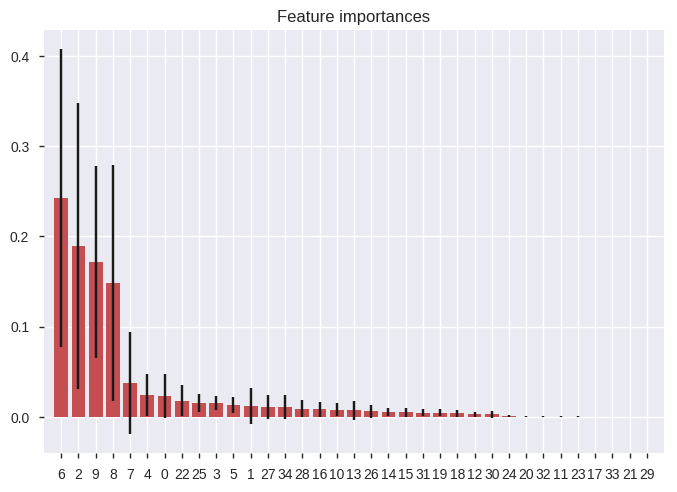

In [14]:
# Find top features by ExtraTrees random forest algorithm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor

f_columns = list(df_features.drop(['score'], axis=1).columns)

X = df_features[f_columns].as_matrix()
y = df_features['score'].values

# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f, col_name in zip(range(X.shape[1]), f_columns):
    print("%d. feature %d - '%s' (%f)" % (f + 1, indices[f], col_name, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Summary:
It is unclear if the submissions score can be accurately predicted by available data, but answering the question the most informative features are:
- 'is_video' - if submission contains video
- 'media' - if submission contains video or image
- 'num_comments' - number of comments in submission
- 'num_crossposts' - number of crossposts
- quality and length of title and text
- virality
- authors count of other submissions

_______

## 7) Business insights


In [15]:
# Top nouns in comments
df_nouns = df_comments['body'].str.replace(r'!+|\?+|\.+|,+|\(|\)|\'|\[|\]|\{|\}|:|;', ' ').apply(lambda x: ' '.join(TextBlob(x).noun_phrases))
wordlist = ' '.join(df_nouns.values).split()
df_w = pd.DataFrame(wordlist, columns=['word'])
df_w = df_w.reset_index().groupby('word').count().reset_index()
df_w[df_w['word'].str.len() > 3].sort_values('index', ascending=False).head(25)

word  index
1286                                           lens    235
1311                                           link    231
2057                              snapchat_com_link    222
1603                                     other_link    101
1866                                       remindme     79
2056                                       snapchat     74
2469                                           work     66
2055                                           snap     64
1516                                           nice     52
967                                            good     52
838                                          filter     45
2218                                         thanks     44
983                                           great     43
1288                                         lenses     42
658                                           doesn     39
1724                                         please     39
270                                         awesome     36
524                                            cool     36
1287                                          lense     35
2217                                          thank     34
2385                                          video     31
2588  😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂     28
724                                          effect     25
194                                         amazing     24
2061                                       snapcode     24

In [17]:
# Submissions between 2018-04-15 and 2018-05-01 
import datetime as dt
df_april = df_submissions[['created_utc', 'is_video', 'flair', 'author', 'score', 'num_comments', 'title', 'selftext', 'url']]
df_april['created_utc'] = pd.to_datetime(df_april['created_utc'],
                                              unit='s',
                                              utc=True).apply(lambda x: x.date())
df_april[(df_april['created_utc'] > dt.datetime(2018, 4, 15).date()) & 
         (df_april['created_utc'] < dt.datetime(2018, 5, 1).date())].sort_values('num_comments', ascending=False)

/home/asvic/code/aognenskiy-snaplenses/snap/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


created_utc  is_video            flair            author  score  \
690  2018-04-24     False      NEW LENS 2D           ZoarkFX    475   
756  2018-04-20     False    ADVERTISEMENT      InformalTech    530   
872  2018-04-16      True      NEW LENS 2D        mendeza503   1585   
709  2018-04-23      True    NEW FACE LENS         oops_caps    951   
746  2018-04-21     False         no_flair     AutoModerator      6   
633  2018-04-30     False          REQUEST        its_ernie_    322   
635  2018-04-29      True    NEW FACE LENS         Mol10Lava   1032   
648  2018-04-28      True      NEW LENS 2D     ApocTheLegend   1181   
843  2018-04-17      True    NEW FACE LENS         oops_caps    947   
653  2018-04-28     False         no_flair     AutoModerator      9   
675  2018-04-25     False    NEW FACE LENS           Andi1up    465   
779  2018-04-19     False          REQUEST          RockyB97    306   
813  2018-04-18     False    NEW FACE LENS     Monsieur_Lixm    564   
739  2018-04-21     False          REQUEST  oficer_drty_npls    587   
859  2018-04-17      True      NEW LENS 2D    Jinnie_the_Wew     92   
628  2018-04-30     False          REQUEST           Sp00ked    747   
795  2018-04-18     False    NEW FACE LENS   Super_Panda_Boy    625   
681  2018-04-25     False      NEW LENS 2D          thebigro    318   
697  2018-04-24     False    NEW FACE LENS    YoungDimmaDome    294   
853  2018-04-17      True    NEW FACE LENS        Bennyp3333    451   
651  2018-04-28      True             MEME        scurrscurr    262   
708  2018-04-23     False          REQUEST        Tyraniccus     22   
755  2018-04-20      True    NEW FACE LENS    Jinnie_the_Wew    146   
822  2018-04-18      True    NEW FACE LENS         Numbaz501     16   
861  2018-04-17      True         no_flair       PapiShmince    453   
647  2018-04-28      True      NEW LENS 3D       allthingsvr    182   
629  2018-04-30      True      NEW LENS 3D        mendeza503    114   
713  2018-04-23     False      NEW LENS 2D           ZoarkFX      7   
759  2018-04-20     False         no_flair           Vodkool     52   
855  2018-04-17     False         no_flair        vladislov_     50   
..          ...       ...              ...               ...    ...   
702  2018-04-23     False         no_flair            bluuyo      1   
845  2018-04-17     False         no_flair          sprofane      2   
785  2018-04-19     False      NEW LENS 3D          sprofane      5   
793  2018-04-19     False             MEME          JeffResc      4   
775  2018-04-19     False         no_flair          JeffResc      1   
774  2018-04-19     False         no_flair      SJT_Official      0   
799  2018-04-18     False    NEW FACE LENS      ThatSunglass      1   
772  2018-04-19     False         no_flair          JeffResc      0   
769  2018-04-19     False         no_flair     Supersave1111      2   
805  2018-04-18     False         no_flair         Thomaxius      0   
766  2018-04-19     False      NEW LENS 3D          JeffResc      1   
765  2018-04-20     False         no_flair    SilverSurfer93      2   
808  2018-04-18     False    NEW FACE LENS    MartinBrothers      3   
754  2018-04-20     False         no_flair          sprofane      5   
626  2018-04-30     False         no_flair         Chris_HCE      3   
815  2018-04-18     False         no_flair    Temmus_Desu_Ne      2   
817  2018-04-18     False         no_flair            yur4ak      2   
748  2018-04-20     False         no_flair       karenxxneko      1   
744  2018-04-21     False         no_flair          RockyB97      0   
823  2018-04-18     False    NEW FACE LENS           dombeef      3   
737  2018-04-21      True  PROGRESS UPDATE           Fuseman      3   
825  2018-04-18     False    NEW FACE LENS           dombeef      2   
826  2018-04-18     False         no_flair        stevieboyk      1   
736  2018-04-21     False      NEW LENS 3D     stupidmilkkid      5   
734  2018-04-21     False   

### Summary:
1) The submissions in weeks with abnormally high activity in the second part of April are mostly general in nature. Though it might be related to media coverage of such topics as:
- New Face Filters
https://www.theverge.com/2018/4/17/17245008/snapchat-face-filter-creation-lens-studio-giphy-discover
- Snappables
https://www.snap.com/en-US/news/post/introducing-snappables/
- Snapchat Spectacles 2
https://techcrunch.com/2018/04/26/snapchat-spectacles-2/

2) Subreddit user activity might be influenced by seasonal factors.

3) Reddit Flairs help users navigate through content and increase chances of additional activity in submission.

4) Coherent marketing strategy might improve acquisition and retention metrics. Techniques like gamification and trending topics might incentivize users to create high-quality and viral content.